In [2]:
import keras
from keras.layers import Activation, Dense, Dropout, Conv2D, \
                         Flatten, MaxPooling2D
from keras.models import Sequential
import librosa
import librosa.display
import numpy as np
import pandas as pd
import random
import os

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [28]:
# creat the dataframe 

names = []
classes = []
classID = []

for ID, filename in enumerate(os.listdir('__MACOSX/Datasets')):
    if not filename.startswith('.'):
        for soundname in os.listdir('__MACOSX/Datasets'+'/' + filename):
            if soundname.endswith(".wav") or soundname.endswith(".mps") or soundname.endswith(".m4a"): 
                names.append(soundname)
                classes.append(filename)
                classID.append(ID-1)
            else:
                continue
        
#names.append()

data = {'file_name':  names,
        'classes': classes,
        'classID': classID
        }

df = pd.DataFrame(data, columns = ['file_name', 'classes', 'classID'])

In [34]:
df.shape

(637, 3)

In [39]:
# Example of a Siren spectrogram
y, sr = librosa.load('__MACOSX/Datasets/Drinking/._66945__nanascho3__bottle-drink.wav', duration=2.97)
ps = librosa.feature.melspectrogram(y=y, sr=sr)
ps.shape

NoBackendError: 

In [6]:
librosa.display.specshow(ps, y_axis='mel', x_axis='time')

In [7]:
# Example of a AC spectrogram
y, sr = librosa.load('UrbanSound8K/audio/fold1/134717-0-0-19.wav', duration=2.97)
ps = librosa.feature.melspectrogram(y=y, sr=sr)
ps.shape

(128, 128)

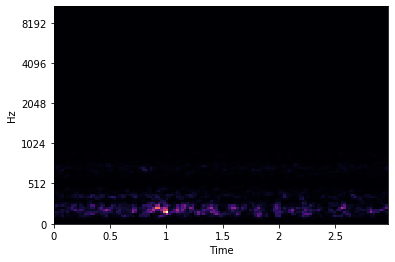

In [8]:
librosa.display.specshow(ps, y_axis='mel', x_axis='time')

In [9]:
# Example of a children playing spectrogram
y, sr = librosa.load('UrbanSound8K/audio/fold9/13579-2-0-16.wav', duration=2.97)
ps = librosa.feature.melspectrogram(y=y, sr=sr)
ps.shape

(128, 128)

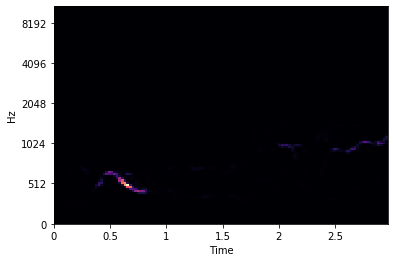

In [10]:
librosa.display.specshow(ps, y_axis='mel', x_axis='time')

In [11]:
# Example of a drilling spectrogram
y, sr = librosa.load('UrbanSound8K/audio/fold9/137815-4-0-0.wav', duration=2.97)
ps = librosa.feature.melspectrogram(y=y, sr=sr)
ps.shape

(128, 128)

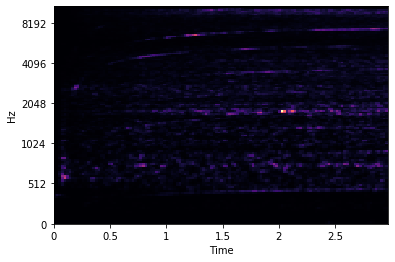

In [12]:
librosa.display.specshow(ps, y_axis='mel', x_axis='time')

Iterate over all samples in _valid_.
For every sample, construct the (128,128) spectrogram

In [13]:
valid_data['path'] = 'fold' + valid_data['fold'].astype('str') + '/' + valid_data['slice_file_name'].astype('str')

In [14]:
D = [] # Dataset

for row in valid_data.itertuples():
    y, sr = librosa.load('UrbanSound8K/audio/' + row.path, duration=2.97)  
    ps = librosa.feature.melspectrogram(y=y, sr=sr)
    if ps.shape != (128, 128): continue
    D.append( (ps, row.classID) )

In [15]:
print("Number of samples: ", len(D))

Number of samples:  7467


In [16]:
dataset = D
random.shuffle(dataset)

train = dataset[:7000]
test = dataset[7000:]

X_train, y_train = zip(*train)
X_test, y_test = zip(*test)

# Reshape for CNN input
X_train = np.array([x.reshape( (128, 128, 1) ) for x in X_train])
X_test = np.array([x.reshape( (128, 128, 1) ) for x in X_test])

# One-Hot encoding for classes
y_train = np.array(keras.utils.to_categorical(y_train, 10))
y_test = np.array(keras.utils.to_categorical(y_test, 10))

In [17]:
model = Sequential()
input_shape=(128, 128, 1)

model.add(Conv2D(24, (5, 5), strides=(1, 1), input_shape=input_shape))
model.add(MaxPooling2D((4, 2), strides=(4, 2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (5, 5), padding="valid"))
model.add(MaxPooling2D((4, 2), strides=(4, 2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (5, 5), padding="valid"))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dropout(rate=0.5))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(10))
model.add(Activation('softmax'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [18]:
model.compile(
	optimizer="Adam",
	loss="categorical_crossentropy",
	metrics=['accuracy'])

model.fit(
	x=X_train, 
	y=y_train,
    epochs=12,
    batch_size=128,
    validation_data= (X_test, y_test))

score = model.evaluate(
	x=X_test,
	y=y_test)

print('Test loss:', score[0])
print('Test accuracy:', score[1])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 7000 samples, validate on 467 samples
Epoch 1/12





7000/7000 [==============================] - 55s 8ms/step - loss: 2.6436 - acc: 0.2104 - val_loss: 2.0180 - val_acc: 0.3876
Epoch 2/12
7000/7000 [==============================] - 53s 8ms/step - loss: 2.0157 - acc: 0.2976 - val_loss: 1.6858 - val_acc: 0.4047
Epoch 3/12
7000/7000 [==============================] - 51s 7ms/step - loss: 1.8008 - acc: 0.3614 - val_loss: 1.6362 - val_acc: 0.4625
Epoch 4/12
7000/7000 [==============================] - 45s 6ms/step - loss: 1.7009 - acc: 0.3933 - val_loss: 1.4402 - val_acc: 0.5139
Epoch 5/12
7000/7000 [==============================] - 46s 7ms/step - loss: 1.5596 - acc: 0.4439 - val_loss: 1.3189 - val_acc: 0.5632
Epoch 6/12
7000/7000 [==============================] - 48s 7ms/step - loss: 1.4253 - acc: 0.4973 - val_loss: 1.1562 - val_acc: 0.6445
Epoch 7/12
7000/7000 [=================

We are able to get over $70-75\%$ accuracy. Nice!

## Data Augmentation

### 1. Vary Time

In [19]:
y, sr = librosa.load('UrbanSound8K/audio/fold1/14113-4-0-1.wav', duration=2.97)
y_changed = librosa.effects.time_stretch(y, rate=0.81)

dirName = 'augmented/fold1/speed_81'
# Create target directory & all intermediate directories if don't exists
try:
    os.makedirs(dirName)    
    print("Directory " , dirName ,  " Created ")
except FileExistsError:
    print("Directory " , dirName ,  " already exists")  

librosa.output.write_wav(dirName + '/' + '14113-4-0-1.wav' ,y_changed, sr)

Directory  augmented/fold1/speed_81  already exists


In [ ]:
rate = 1.07 # replace with 0.81 and execute again

for row in valid_data.itertuples():
    y, sr = librosa.load('UrbanSound8K/audio/' + row.path)  
    y_changed = librosa.effects.time_stretch(y, rate=rate)
    dirName = 'augmented/fold' + str(row.fold) + '/speed_' + str(int(rate*100))
    # Create target directory & all intermediate directories if don't exists
    try:
        os.makedirs(dirName)    
    except FileExistsError:
        print("Directory " , dirName ,  " already exists")  
    librosa.output.write_wav(dirName + '/' + row.slice_file_name ,y_changed, sr)

Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold2/speed_107  already exists
Directory  augmented/fold2/speed_107  already exists
Directory  augmented/fold2/speed_107  already exists
Directory  augmented/fold10/speed_107  already exists
Directory  augmented/fold10/speed_107  already exists
Directory  augmented/fold10/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  alrea

Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold3/speed_107  already 

Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already 

Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold7/speed_107  already exists
Directory  augmented/fold7/speed_107  already exists
Directory  augmented/fold7/speed_107  already exists
Directory  augmented/fold7/speed_107  already exists
Directory  augmented/fold7/speed_107  already exists
Directory  augmented/fold7/speed_107  already exists
Directory  augmented/fold7/speed_107  already 

Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold2/speed_107  already exists
Directory  augmented/fold2/speed_107  already exists
Directory  augmented/fold2/speed_107  already exists
Directory  augmented/fold2/speed_107  already exists
Directory  augmented/fold2/speed_107  already 

Directory  augmented/fold9/speed_107  already exists
Directory  augmented/fold9/speed_107  already exists
Directory  augmented/fold9/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold7/speed_107  already exists
Directory  augmented/fold7/speed_107  already exists
Directory  augmented/fold7/speed_107  already exists
Directory  augmented/fold7/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already 

Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold7/speed_107  already exists
Directory  augmented/fold7/speed_107  already exists
Directory  augmented/fold7/speed_107  already exists
Directory  augmented/fold7/speed_107  already exists
Directory  augmented/fold7/speed_107  already exists
Directory  augmented/fold7/speed_107  already exists
Directory  augmented/fold7/speed_107  already exists
Directory  augmented/fold7/speed_107  already exists
Directory  augmented/fold7/speed_107  already exists
Directory  augmented/fold2/speed_107  already exists
Directory  augmented/fold2/speed_107  already exists
Directory  augmented/fold2/speed_107  already exists
Directory  augmented/fold2/speed_107  already 

Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already 

Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold8/speed_107  already 

Directory  augmented/fold10/speed_107  already exists
Directory  augmented/fold10/speed_107  already exists
Directory  augmented/fold10/speed_107  already exists
Directory  augmented/fold10/speed_107  already exists
Directory  augmented/fold10/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold9/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  alr

Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already 

Directory  augmented/fold7/speed_107  already exists
Directory  augmented/fold7/speed_107  already exists
Directory  augmented/fold7/speed_107  already exists
Directory  augmented/fold7/speed_107  already exists
Directory  augmented/fold7/speed_107  already exists
Directory  augmented/fold7/speed_107  already exists
Directory  augmented/fold7/speed_107  already exists
Directory  augmented/fold7/speed_107  already exists
Directory  augmented/fold7/speed_107  already exists
Directory  augmented/fold7/speed_107  already exists
Directory  augmented/fold7/speed_107  already exists
Directory  augmented/fold7/speed_107  already exists
Directory  augmented/fold7/speed_107  already exists
Directory  augmented/fold7/speed_107  already exists
Directory  augmented/fold7/speed_107  already exists
Directory  augmented/fold7/speed_107  already exists
Directory  augmented/fold7/speed_107  already exists
Directory  augmented/fold7/speed_107  already exists
Directory  augmented/fold7/speed_107  already 

Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold9/speed_107  already exists
Directory  augmented/fold9/speed_107  already exists
Directory  augmented/fold9/speed_107  already exists
Directory  augmented/fold9/speed_107  already exists
Directory  augmented/fold9/speed_107  already exists
Directory  augmented/fold9/speed_107  already exists
Directory  augmented/fold9/speed_107  already exists
Directory  augmented/fold2/speed_107  already exists
Directory  augmented/fold2/speed_107  already exists
Directory  augmented/fold2/speed_107  already exists
Directory  augmented/fold2/speed_107  already exists
Directory  augmented/fold2/speed_107  already exists
Directory  augmented/fold2/speed_107  already exists
Directory  augmented/fold2/speed_107  already exists
Directory  augmented/fold2/speed_107  already 

Directory  augmented/fold9/speed_107  already exists
Directory  augmented/fold7/speed_107  already exists
Directory  augmented/fold7/speed_107  already exists
Directory  augmented/fold7/speed_107  already exists
Directory  augmented/fold7/speed_107  already exists
Directory  augmented/fold6/speed_107  already exists
Directory  augmented/fold10/speed_107  already exists
Directory  augmented/fold10/speed_107  already exists
Directory  augmented/fold10/speed_107  already exists
Directory  augmented/fold10/speed_107  already exists
Directory  augmented/fold10/speed_107  already exists
Directory  augmented/fold10/speed_107  already exists
Directory  augmented/fold10/speed_107  already exists
Directory  augmented/fold10/speed_107  already exists
Directory  augmented/fold10/speed_107  already exists
Directory  augmented/fold10/speed_107  already exists
Directory  augmented/fold10/speed_107  already exists
Directory  augmented/fold10/speed_107  already exists
Directory  augmented/fold10/speed_

Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold8/speed_107  already 

Directory  augmented/fold2/speed_107  already exists
Directory  augmented/fold2/speed_107  already exists
Directory  augmented/fold2/speed_107  already exists
Directory  augmented/fold2/speed_107  already exists
Directory  augmented/fold2/speed_107  already exists
Directory  augmented/fold2/speed_107  already exists
Directory  augmented/fold2/speed_107  already exists
Directory  augmented/fold2/speed_107  already exists
Directory  augmented/fold2/speed_107  already exists
Directory  augmented/fold2/speed_107  already exists
Directory  augmented/fold9/speed_107  already exists
Directory  augmented/fold9/speed_107  already exists
Directory  augmented/fold9/speed_107  already exists
Directory  augmented/fold9/speed_107  already exists
Directory  augmented/fold9/speed_107  already exists
Directory  augmented/fold9/speed_107  already exists
Directory  augmented/fold9/speed_107  already exists
Directory  augmented/fold9/speed_107  already exists
Directory  augmented/fold9/speed_107  already 

Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold6/speed_107  already exists
Directory  augmented/fold6/speed_107  already exists
Directory  augmented/fold6/speed_107  already exists
Directory  augmented/fold6/speed_107  already exists
Directory  augmented/fold6/speed_107  already exists
Directory  augmented/fold6/speed_107  already exists
Directory  augmented/fold6/speed_107  already exists
Directory  augmented/fold6/speed_107  already exists
Directory  augmented/fold8/speed_107  already 

Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already 

Directory  augmented/fold10/speed_107  already exists
Directory  augmented/fold10/speed_107  already exists
Directory  augmented/fold10/speed_107  already exists
Directory  augmented/fold10/speed_107  already exists
Directory  augmented/fold10/speed_107  already exists
Directory  augmented/fold10/speed_107  already exists
Directory  augmented/fold6/speed_107  already exists
Directory  augmented/fold6/speed_107  already exists
Directory  augmented/fold6/speed_107  already exists
Directory  augmented/fold6/speed_107  already exists
Directory  augmented/fold6/speed_107  already exists
Directory  augmented/fold6/speed_107  already exists
Directory  augmented/fold6/speed_107  already exists
Directory  augmented/fold6/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold8/speed_107  al

Directory  augmented/fold7/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already 

Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already 

Directory  augmented/fold2/speed_107  already exists
Directory  augmented/fold2/speed_107  already exists
Directory  augmented/fold2/speed_107  already exists
Directory  augmented/fold2/speed_107  already exists
Directory  augmented/fold2/speed_107  already exists
Directory  augmented/fold2/speed_107  already exists
Directory  augmented/fold2/speed_107  already exists
Directory  augmented/fold2/speed_107  already exists
Directory  augmented/fold9/speed_107  already exists
Directory  augmented/fold9/speed_107  already exists
Directory  augmented/fold9/speed_107  already exists
Directory  augmented/fold9/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already 

Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold10/speed_107  already exists
Directory  augmented/fold10/speed_107  already exists
Directory  augmented/fold10/speed_107  already exists
Directory  augmented/fold10/speed_107  already exists
Directory  augmented/fold10/speed_107  alr

Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold2/speed_107  already exists
Directory  augmented/fold2/speed_107  already exists
Directory  augmented/fold2/speed_107  already 

Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already 

Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold2/speed_107  already exists
Directory  augmented/fold2/speed_107  already exists
Directory  augmented/fold2/speed_107  already exists
Directory  augmented/fold2/speed_107  already exists
Directory  augmented/fold2/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold2/speed_107  already exists
Directory  augmented/fold2/speed_107  already exists
Directory  augmented/fold2/speed_107  already exists
Directory  augmented/fold2/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already 

Directory  augmented/fold7/speed_107  already exists
Directory  augmented/fold7/speed_107  already exists
Directory  augmented/fold7/speed_107  already exists
Directory  augmented/fold7/speed_107  already exists
Directory  augmented/fold7/speed_107  already exists
Directory  augmented/fold7/speed_107  already exists
Directory  augmented/fold7/speed_107  already exists
Directory  augmented/fold7/speed_107  already exists
Directory  augmented/fold7/speed_107  already exists
Directory  augmented/fold7/speed_107  already exists
Directory  augmented/fold7/speed_107  already exists
Directory  augmented/fold10/speed_107  already exists
Directory  augmented/fold10/speed_107  already exists
Directory  augmented/fold10/speed_107  already exists
Directory  augmented/fold10/speed_107  already exists
Directory  augmented/fold10/speed_107  already exists
Directory  augmented/fold10/speed_107  already exists
Directory  augmented/fold10/speed_107  already exists
Directory  augmented/fold10/speed_107  

Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold9/speed_107  already exists
Directory  augmented/fold9/speed_107  already exists
Directory  augmented/fold9/speed_107  already exists
Directory  augmented/fold9/speed_107  already 

Directory  augmented/fold2/speed_107  already exists
Directory  augmented/fold2/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold6/speed_107  already exists
Directory  augmented/fold6/speed_107  already exists
Directory  augmented/fold6/speed_107  already exists
Directory  augmented/fold6/speed_107  already exists
Directory  augmented/fold7/speed_107  already exists
Directory  augmented/fold7/speed_107  already exists
Directory  augmented/fold7/speed_107  already 

Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already 

Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold2/speed_107  already exists
Directory  augmented/fold2/speed_107  already exists
Directory  augmented/fold2/speed_107  already exists
Directory  augmented/fold2/speed_107  already exists
Directory  augmented/fold6/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold10/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already

Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold9/speed_107  already exists
Directory  augmented/fold9/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already 

Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already 

Directory  augmented/fold6/speed_107  already exists
Directory  augmented/fold6/speed_107  already exists
Directory  augmented/fold6/speed_107  already exists
Directory  augmented/fold6/speed_107  already exists
Directory  augmented/fold6/speed_107  already exists
Directory  augmented/fold6/speed_107  already exists
Directory  augmented/fold6/speed_107  already exists
Directory  augmented/fold6/speed_107  already exists
Directory  augmented/fold6/speed_107  already exists
Directory  augmented/fold6/speed_107  already exists
Directory  augmented/fold6/speed_107  already exists
Directory  augmented/fold6/speed_107  already exists
Directory  augmented/fold6/speed_107  already exists
Directory  augmented/fold6/speed_107  already exists
Directory  augmented/fold6/speed_107  already exists
Directory  augmented/fold6/speed_107  already exists
Directory  augmented/fold6/speed_107  already exists
Directory  augmented/fold6/speed_107  already exists
Directory  augmented/fold6/speed_107  already 

Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold6/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold7/speed_107  already exists
Directory  augmented/fold7/speed_107  already exists
Directory  augmented/fold7/speed_107  already exists
Directory  augmented/fold10/speed_107  already exists
Directory  augmented/fold10/speed_107  already exists
Directory  augmented/fold10/speed_107  alrea

Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold9/speed_107  already exists
Directory  augmented/fold9/speed_107  already exists
Directory  augmented/fold9/speed_107  already exists
Directory  augmented/fold9/speed_107  already exists
Directory  augmented/fold9/speed_107  already exists
Directory  augmented/fold9/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold6/speed_107  already 

Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold2/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold10/speed_107  already exists
Directory  augmented/fold10/speed_107  alread

Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already exists
Directory  augmented/fold1/speed_107  already 

Directory  augmented/fold10/speed_107  already exists
Directory  augmented/fold2/speed_107  already exists
Directory  augmented/fold2/speed_107  already exists
Directory  augmented/fold2/speed_107  already exists
Directory  augmented/fold2/speed_107  already exists
Directory  augmented/fold2/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold9/speed_107  already exists
Directory  augmented/fold9/speed_107  already exists
Directory  augmented/fold9/speed_107  already exists
Directory  augmented/fold2/speed_107  already exists
Directory  augmented/fold2/speed_107  already exists
Directory  augmented/fold2/speed_107  already exists
Directory  augmented/fold2/speed_107  already exists
Directory  augmented/fold2/speed_107  already exists
Directory  augmented/fold2/speed_107  already exists
Directory  augmented/fold2/speed_107  already exists
Directory  augmented/fold2/speed_107  already

Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already exists
Directory  augmented/fold3/speed_107  already 

Directory  augmented/fold6/speed_107  already exists
Directory  augmented/fold2/speed_107  already exists
Directory  augmented/fold2/speed_107  already exists
Directory  augmented/fold7/speed_107  already exists
Directory  augmented/fold7/speed_107  already exists
Directory  augmented/fold7/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold8/speed_107  already exists
Directory  augmented/fold7/speed_107  already exists
Directory  augmented/fold7/speed_107  already exists
Directory  augmented/fold7/speed_107  already 

Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already exists
Directory  augmented/fold5/speed_107  already 

Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already exists
Directory  augmented/fold4/speed_107  already 

Directory  augmented/fold6/speed_107  already exists
Directory  augmented/fold6/speed_107  already exists
Directory  augmented/fold6/speed_107  already exists
Directory  augmented/fold6/speed_107  already exists
Directory  augmented/fold6/speed_107  already exists
Directory  augmented/fold6/speed_107  already exists
Directory  augmented/fold6/speed_107  already exists
Directory  augmented/fold6/speed_107  already exists
Directory  augmented/fold6/speed_107  already exists
Directory  augmented/fold6/speed_107  already exists
Directory  augmented/fold6/speed_107  already exists
Directory  augmented/fold6/speed_107  already exists
Directory  augmented/fold6/speed_107  already exists
Directory  augmented/fold6/speed_107  already exists
Directory  augmented/fold6/speed_107  already exists
Directory  augmented/fold6/speed_107  already exists
Directory  augmented/fold6/speed_107  already exists
Directory  augmented/fold6/speed_107  already exists
Directory  augmented/fold3/speed_107  already 

### 2. Vary pitch

In [ ]:
n_steps = 2 #-1, -2, 2, 1

for row in valid_data.itertuples():
    y, sr = librosa.load('code/UrbanSound8K/audio/' + row.path)  
    y_changed = librosa.effects.pitch_shift(y, sr, n_steps=n_steps)
    librosa.output.write_wav('code/augmented/fold' + str(row.fold) + '/ps1_' + str(int(n_steps)) + '/' + row.slice_file_name ,y_changed, sr)

### 3. Change Pitch (PS2)

In [ ]:
n_steps = 2.5 #-2.5, -3.5, 2.5, 3.5

for row in valid_data.itertuples():
    y, sr = librosa.load('code/UrbanSound8K/audio/' + row.path)  
    y_changed = librosa.effects.pitch_shift(y, sr, n_steps=n_steps)
    librosa.output.write_wav('code/augmented/fold' + str(row.fold) + '/ps2_m' + str(int(n_steps*10)) + '/' + row.slice_file_name ,y_changed, sr)

Accidently put ps2_25 files in ps2_m25. 

In [ ]:
len(D)

The dataset consists of:
- 1-7467 normal samples.
- 7468-14934 samples Pitch modulated 2.5 semitones higher.
- 14935-22401 samples Pitch modeulated 2 semitones higher.
- 22402-29869 samples Slowed down to 0.81.
- 29869-37310 samples speed up by 1.07

Follow the same procedure for the normal data.

In [ ]:
dataset = D
random.shuffle(dataset)

train = dataset[:35000]
test = dataset[35000:]

X_train, y_train = zip(*train)
X_test, y_test = zip(*test)

X_train = np.array([x.reshape( (128, 128, 1) ) for x in X_train])
X_test = np.array([x.reshape( (128, 128, 1) ) for x in X_test])

y_train = np.array(keras.utils.to_categorical(y_train, 10))
y_test = np.array(keras.utils.to_categorical(y_test, 10))

In [ ]:
model = Sequential()
input_shape=(128, 128, 1)

model.add(Conv2D(24, (5, 5), strides=(1, 1), input_shape=input_shape))
model.add(MaxPooling2D((4, 2), strides=(4, 2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (5, 5), padding="valid"))
model.add(MaxPooling2D((4, 2), strides=(4, 2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (5, 5), padding="valid"))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dropout(rate=0.5))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(10))
model.add(Activation('softmax'))

In [ ]:
model.compile(
	optimizer="Adam",
	loss="categorical_crossentropy",
	metrics=['accuracy'])

model.fit(
	x=X_train, 
	y=y_train,
    epochs=12,
    batch_size=128,
    validation_data= (X_test, y_test))

score = model.evaluate(
	x=X_test,
	y=y_test)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

With data augmentation, we get upto $82\%$. 